In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Anzahl der Variablen wenn Proof Found und gesamt

In [9]:
def print_graph(file_path: str, title: str, threshold: float, threshold_label: str, output_path: str):
    with open(file_path, 'r') as f:
        data = json.load(f)

    # Prepare a list to store the means for each JSON file
    means = []

    # Iterate over each JSON dataset
    for file_name, counts in data.items():
        if file_name == "union":
            # Calculate the mean of variable counts
            variable_counts = list(counts.values())
            mean_variable_count = sum(variable_counts) / len(variable_counts)
            means.append((file_name, mean_variable_count))

    # Convert to a DataFrame for plotting
    df_means = pd.DataFrame(means, columns=['File', 'MeanVariableCount'])

    # Plot the data
    fig, ax = plt.subplots(figsize=(12, 6))
    bars = ax.bar(df_means['File'], df_means['MeanVariableCount'], color='skyblue', width=0.6)
    ax.set_ylabel('Mean Variable Count', fontsize=12)
    ax.set_xlabel('File', fontsize=12)
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.axhline(y=threshold, color='r', linestyle='--', label=f'{threshold_label}: {threshold}')
    ax.legend()

    # Set the rotation for x-axis labels to improve readability
    ax.set_xticklabels(df_means['File'], rotation=45, ha='right', fontsize=10)

    # Introduce horizontal grid lines
    ax.yaxis.grid(True, linestyle='--', which='major', color='gray', alpha=0.7)
    ax.set_axisbelow(True)

    # Add text annotations (mean values) above the bars
    for bar in bars:
        yval = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            yval + 0.01 * yval,  # small offset above the bar
            f'{yval:.2f}',
            ha='center',
            va='bottom',
            fontsize=10,
            color='black'
        )

    # Save plot as a PDF with tight layout
    plt.tight_layout()
    path_prefix = "/Users/eltorrogrande/BachelorInformatik/BachelorThesis/further-work-of-seven/text/"
    save_path = path_prefix + output_path
    plt.savefig(save_path, format='pdf', bbox_inches='tight')
    plt.show()
    plt.close(fig)

# Example usage
# print_graph('evaluation/variable_counts_grouped.json', "Variable Count Analysis", 50, 'Threshold', 'variable_count_analysis.pdf')

/var/folders/k1/jwtm00211m596cq2_gjvyz200000gn/T/ipykernel_18734/1197704186.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_means['File'], rotation=45, ha='right', fontsize=10)


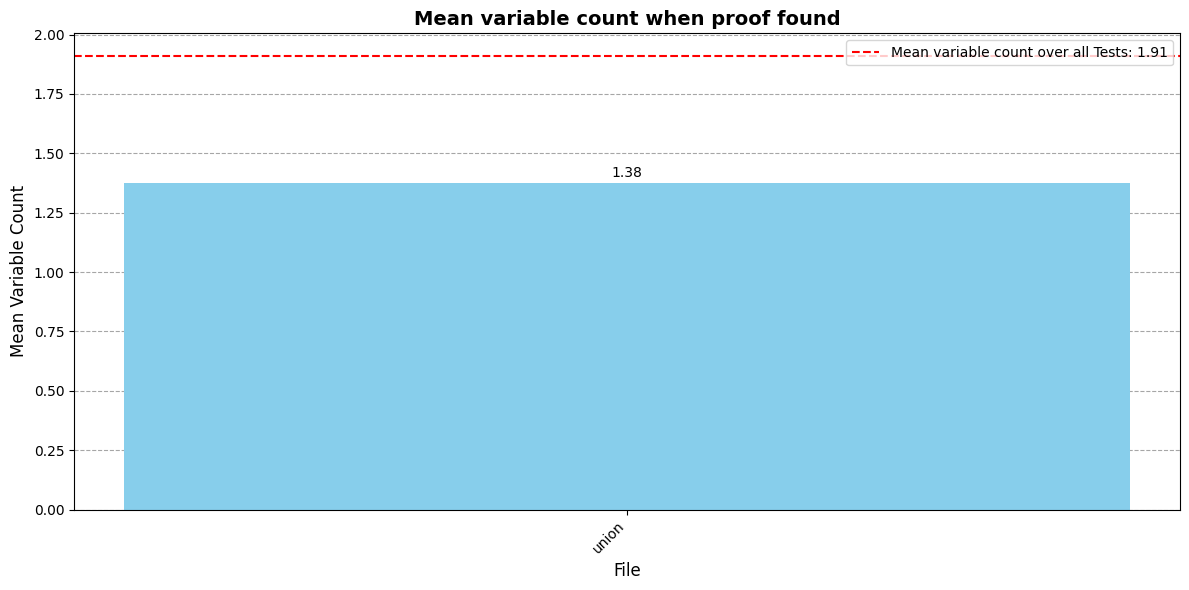

In [10]:
print_graph(file_path="variable_counts_grouped_proof_found.json", title="Mean variable count when proof found" ,threshold=1.91, threshold_label="Mean variable count over all Tests", output_path="variable_count.pdf")

#### Count signs |, &, ?, !, ~

/var/folders/k1/jwtm00211m596cq2_gjvyz200000gn/T/ipykernel_13285/8982280.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_means['File'], rotation=45, ha='right', fontsize=10)


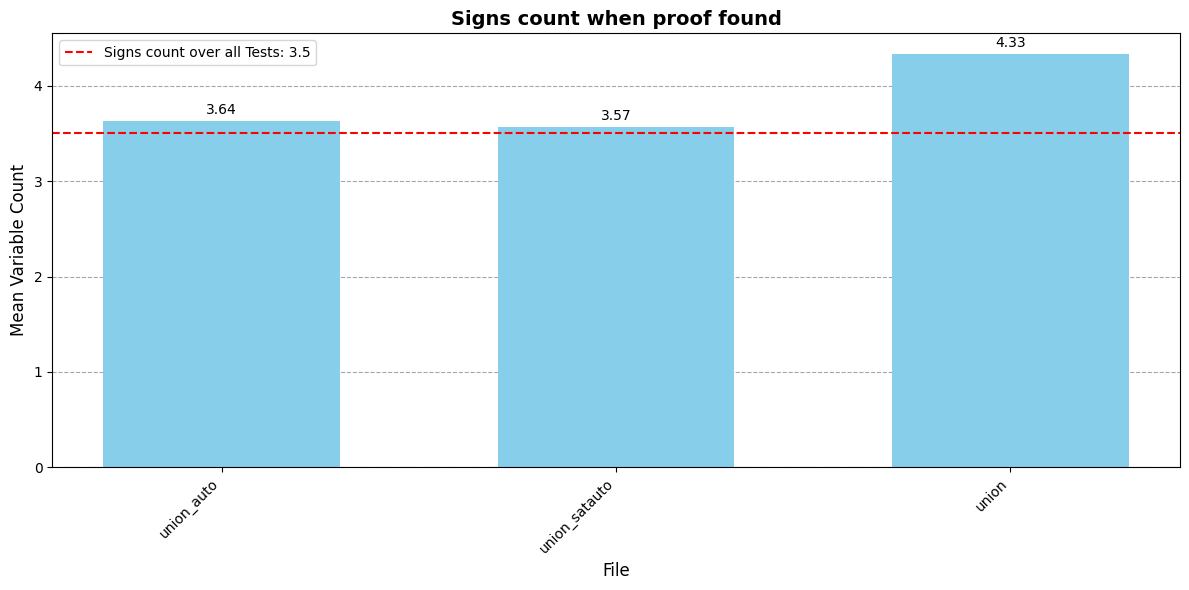

In [35]:
print_graph(file_path="signs_counts_grouped_proof_found.json", title="Signs count when proof found" ,threshold=3.5, threshold_label="Signs count over all Tests", output_path="signs_count.pdf")

#### Character Count

/var/folders/k1/jwtm00211m596cq2_gjvyz200000gn/T/ipykernel_13285/8982280.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_means['File'], rotation=45, ha='right', fontsize=10)


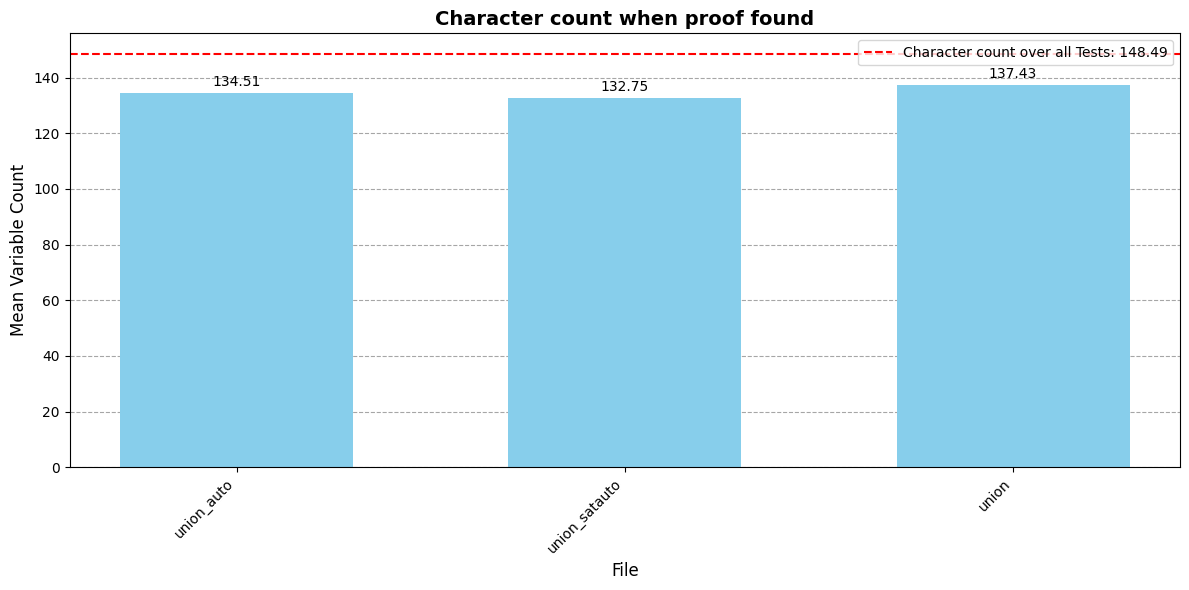

In [37]:
print_graph(file_path="character_counts_grouped_proof_found.json", title="Character count when proof found" ,threshold=148.49, threshold_label="Character count over all Tests", output_path="character_count.pdf")

NOUNION ONLY

/var/folders/k1/jwtm00211m596cq2_gjvyz200000gn/T/ipykernel_27110/8982280.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_means['File'], rotation=45, ha='right', fontsize=10)


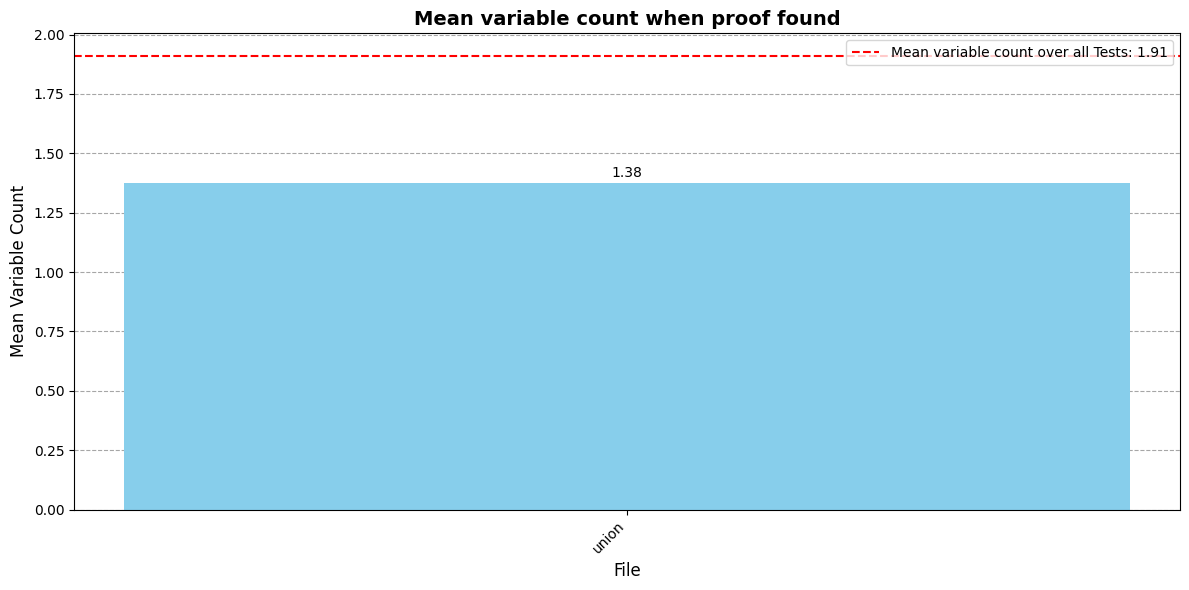

In [5]:
print_graph(file_path="variable_counts_grouped_proof_found_noauto.json", title="Mean variable count when proof found" ,threshold=1.91, threshold_label="Mean variable count over all Tests", output_path="variable_count_noauto.pdf")

/var/folders/k1/jwtm00211m596cq2_gjvyz200000gn/T/ipykernel_27110/8982280.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_means['File'], rotation=45, ha='right', fontsize=10)


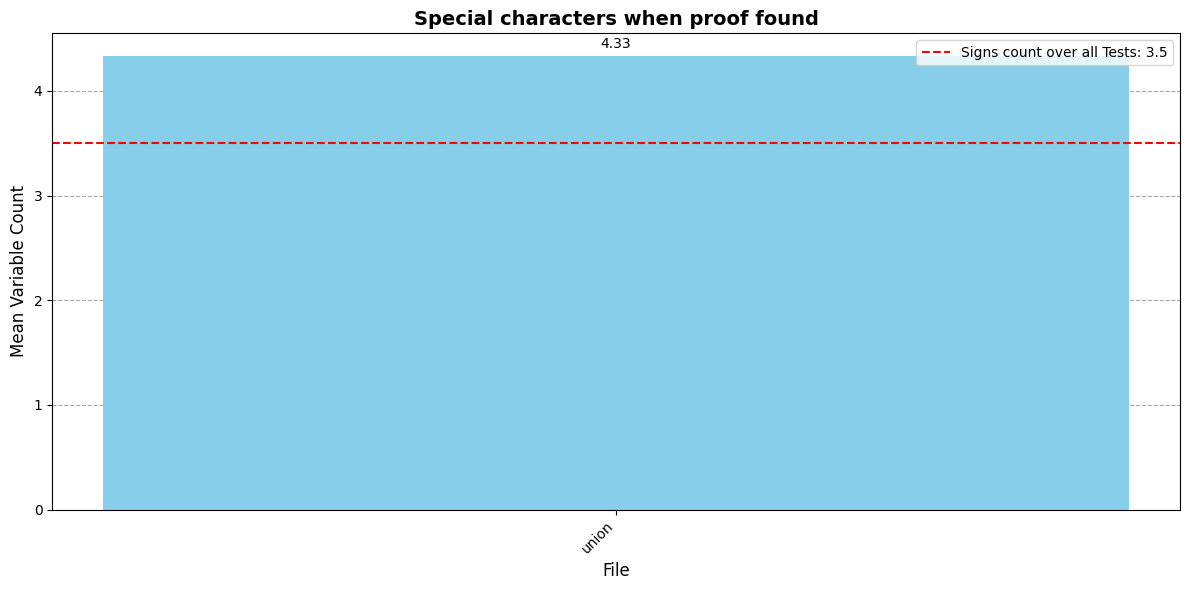

In [6]:
print_graph(file_path="signs_counts_grouped_proof_found_noauto.json", title="Special characters when proof found" ,threshold=3.5, threshold_label="Signs count over all Tests", output_path="signs_count_noauto.pdf")

/var/folders/k1/jwtm00211m596cq2_gjvyz200000gn/T/ipykernel_27110/8982280.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_means['File'], rotation=45, ha='right', fontsize=10)


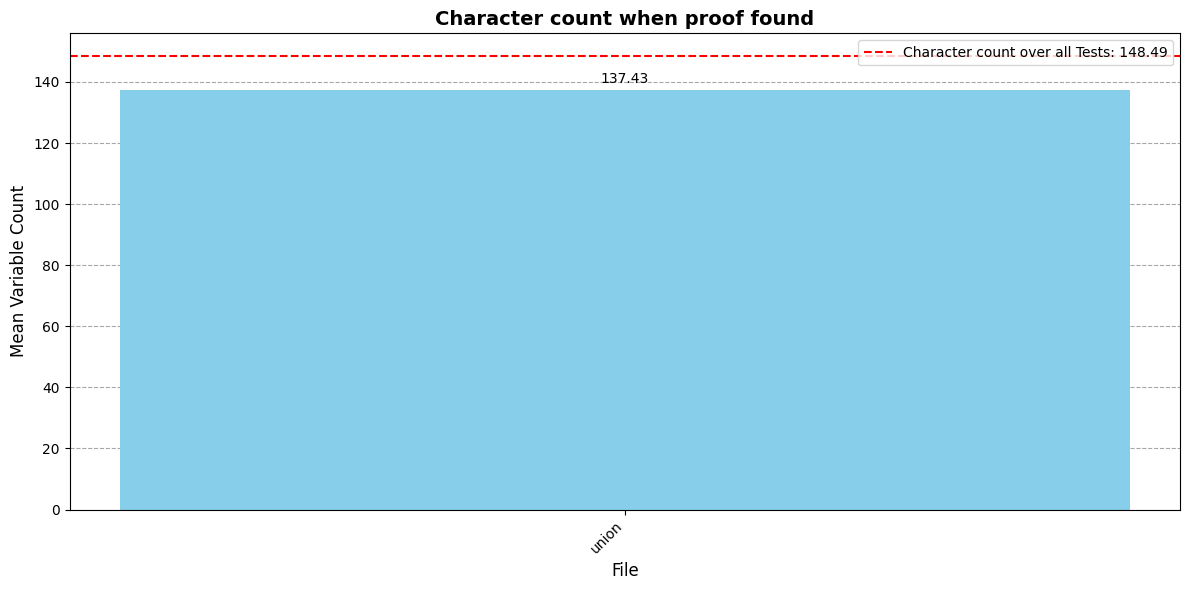

In [7]:
print_graph(file_path="character_counts_grouped_proof_found_noauto.json", title="Character count when proof found" ,threshold=148.49, threshold_label="Character count over all Tests", output_path="character_count_noauto.pdf")

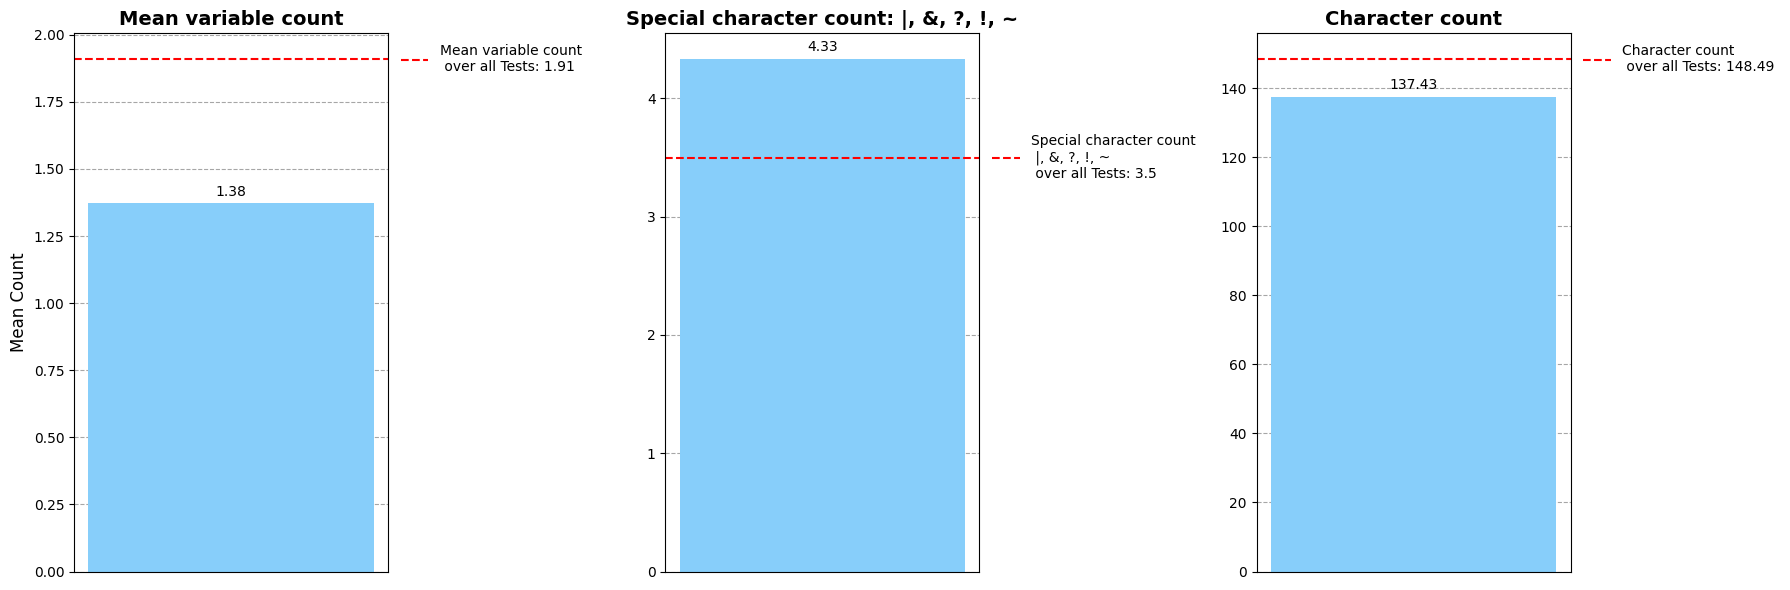

In [21]:
import json
import pandas as pd
import matplotlib.pyplot as plt

def print_combined_graphs(file_paths: list, titles: list, thresholds: list, threshold_labels: list, output_path: str):
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # Create 1 row, 3 columns of subplots
    
    for i, (file_path, title, threshold, threshold_label) in enumerate(zip(file_paths, titles, thresholds, threshold_labels)):
        with open(file_path, 'r') as f:
            data = json.load(f)

        means = []
        for file_name, counts in data.items():
            if file_name == "union":
                variable_counts = list(counts.values())
                mean_variable_count = sum(variable_counts) / len(variable_counts)
                means.append((file_name, mean_variable_count))

        df_means = pd.DataFrame(means, columns=['File', 'MeanVariableCount'])

        ax = axes[i]  # Select the current subplot
        bars = ax.bar(df_means['File'], df_means['MeanVariableCount'], color='lightskyblue', width=0.6)
        
        if i == 0:  # Only add y-axis label to the first (leftmost) subplot
            ax.set_ylabel('Mean Count', fontsize=12)
        
        ax.set_title(title, fontsize=14, fontweight='bold')

        # Draw threshold line
        threshold_line = ax.axhline(y=threshold, color='r', linestyle='--')

        # Position legend at the threshold line's height
        ax.legend([threshold_line], [f'{threshold_label}: {threshold}'], loc="center left", bbox_to_anchor=(1, threshold / ax.get_ylim()[1]), frameon=False)

        ax.set_xticks([])  # Remove x-axis tick labels
        ax.yaxis.grid(True, linestyle='--', which='major', color='gray', alpha=0.7)
        ax.set_axisbelow(True)

        for bar in bars:
            yval = bar.get_height()
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                yval + 0.01 * yval,
                f'{yval:.2f}',
                ha='center',
                va='bottom',
                fontsize=10,
                color='black'
            )

    plt.tight_layout()
    path_prefix = "/Users/eltorrogrande/BachelorInformatik/BachelorThesis/further-work-of-seven/text/"
    save_path = path_prefix + output_path
    plt.savefig(save_path, format='pdf', bbox_inches='tight')
    plt.show()
    plt.close(fig)

# Example usage
print_combined_graphs(
    file_paths=[
        "variable_counts_grouped_proof_found.json",
        "signs_counts_grouped_proof_found.json",
        "character_counts_grouped_proof_found.json"
    ],
    titles=[
        "Mean variable count",
        "Special character count: |, &, ?, !, ~",
        "Character count"
    ],
    thresholds=[1.91, 3.5, 148.49],
    threshold_labels=[
        "Mean variable count \n over all Tests",
        "Special character count \n |, &, ?, !, ~ \n over all Tests",
        "Character count \n over all Tests"
    ],
    output_path="combined_graphs.pdf"
)
